In [15]:
import pandas as pd

**Lettura di un dataframe**

Leggiamo il dataset relativo al Titanic, e mostriamone le prime cinque righe.

In [16]:
titanic = pd.read_csv('../../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Lettura di una serie**

Estraiamo la serie contenente tutti i nomi dei passeggeri.

In [17]:
names = titanic['Name']
names.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

**Lettura di un dato**

Facciamo in modo che l'indice del dataset diventi la colonna `Ticket`, e mostriamo a schermo il nome del passeggero il cui biglietto è pari a **STON/02. 3101282**.

In [18]:
titanic.set_index('Ticket', inplace=True)
titanic.loc['STON/O2. 3101282', 'Fare']

7.925

**Le funzioni `loc()` ed `iloc()`**

Possiamo anche accedere in scrittura ad un attributo. In questo caso, usiamo `loc()`, ma per farlo possiamo usare anche `iloc()`:

In [19]:
titanic.loc['STON/O2. 3101282', 'Name'] = 'Pippo'

Possiamo anche accedere all'interno dato mediante la funzione `loc()`:

In [20]:
titanic.loc['STON/O2. 3101282', :]      # Lo slicing può essere omesso

PassengerId         3
Survived            1
Pclass              3
Name            Pippo
Sex            female
Age              26.0
SibSp               0
Parch               0
Fare            7.925
Cabin             NaN
Embarked            S
Name: STON/O2. 3101282, dtype: object

**Slicing**

Proviamo ad accedere a classe e nome dei passeggeri che vanno dal secondo al quinto.

In [21]:
print(titanic.iloc[2:5, 2:5])

                  Pclass                                          Name     Sex
Ticket                                                                        
STON/O2. 3101282       3                                         Pippo  female
113803                 1  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female
373450                 3                      Allen, Mr. William Henry    male


**Aggiunta di una feature e di un campione**

Vediamo come aggiungere una nuova colonna ad un dataframe. In particolare, creiamo un dataframe fatto da un'unica colonna di numeri interi, ed aggiungiamovene un'altra pari esattamente al doppio della prima.

In [22]:
df = pd.DataFrame([1,2,3,4,5], columns=['one'])     
df['due'] = df['one'] * 2
df

,one,due
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


La stessa operazione può essere effettuata con il metodo `concat()`, che accetta, tra i vari parametri, la lista dei dataframe da concatenare e l'asse sul quale effettuare l'operazione. In particolare, proviamo ad effettuarla aggiungendo prima una colonna:

In [23]:
df_three_vals = df['one'] * 3
df_three = pd.DataFrame([3, 4, 5, 6,7], columns=['three'])
df_new_col = pd.concat([df, df_three], axis=1)
df_new_col

,one,due,three
0,1,2,3
1,2,4,4
2,3,6,5
3,4,8,6
4,5,10,7


e poi una riga:

In [24]:
df_add = pd.DataFrame([[6, 12, 18]], columns=['one', 'due', 'three']) 
df_last = pd.concat([df_new_col, df_add])
df_last.reset_index(inplace=True)
df_last.drop(['index'], axis=1, inplace=True)
df_last

,one,due,three
0,1,2,3
1,2,4,4
2,3,6,5
3,4,8,6
4,5,10,7
5,6,12,18


**Selezione di dati**

Proviamo adesso a selezionare un insieme di dati basandoci su delle regole.

In [25]:
men = titanic[(titanic['Age'] > 18) & (titanic['Sex'] == 'male')]
men.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,,,,,,,,,,,
A/5 21171,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
373450,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
17463,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
A/5. 2151,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,8.0500,NaN,S
347082,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,31.2750,NaN,S


**Descrizione del dataset**

Usiamo la funzione `describe()` per descrivere il dataset.

In [26]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Visualizzazione dei dati**

Visualizziamo in ultimo a schermo due istogrammi che descrivano l'età ed il sesso dei passeggeri.

<AxesSubplot: >

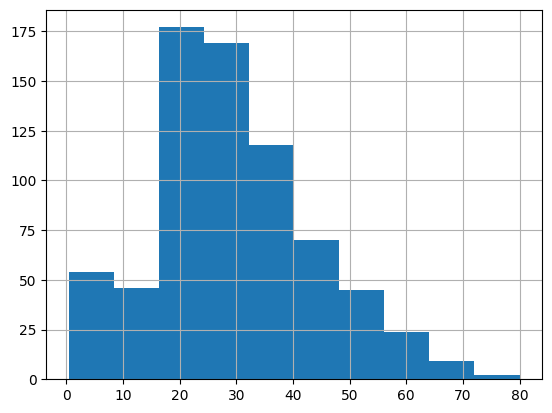

In [27]:
titanic['Age'].hist()

<AxesSubplot: >

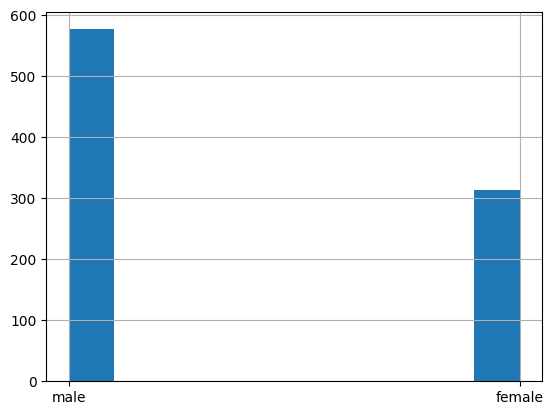

In [28]:
titanic['Sex'].hist()